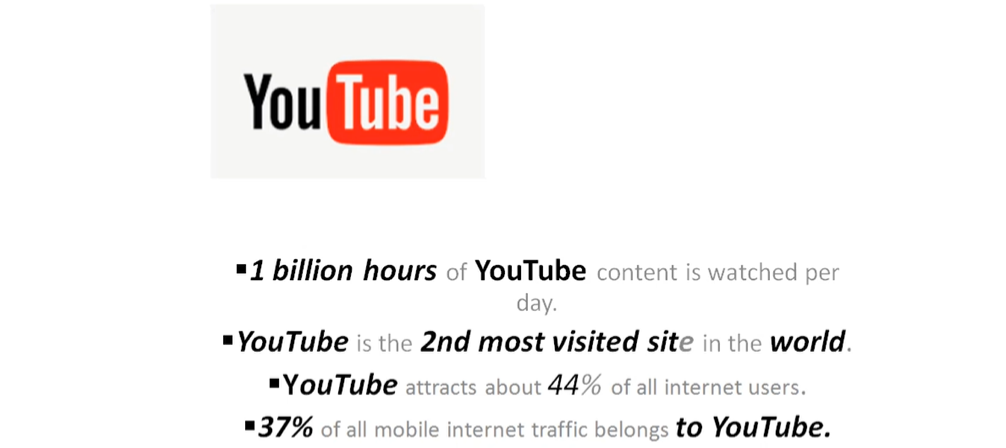

Analysis we can perform on the data.

In [1]:
# Here I will import all the necessary modules
#pandas is used to read, modify and manipulate data.
#numpy is used for numerical computations (mean, median, variation, percentile etc.)
#matplotlib is used for data visualization
#seaborn is also a data viz module. It gives a very beautiful, fast and quick data viz.
#plotly this is used do get a dynamic data viz.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\obafe\OneDrive\Documents\Data analysis projects\Text Data Analysis (Youtube Case study)\UScomments.xlsx"
df = pd.read_excel(path)

In [3]:
df.columns

Index(['video_id', 'comment_text', 'likes', 'replies', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [4]:
columns_to_drop = ['Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10']
df.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0
...,...,...,...,...
691402,EoejGgUNmVU,Ð›ÑƒÑ‡ÑˆÐ°Ñ,1,0
691403,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes Ã Roa...,0,0
691404,EoejGgUNmVU,Ven a mexico! ðŸ˜ te amo LP,0,0
691405,EoejGgUNmVU,IslÄ±ÄŸÄ± yeter...,0,0


Now, I will perform data wrangling

In [6]:
df.isnull().sum()

video_id        9273
comment_text      91
likes              0
replies            0
dtype: int64

In [7]:
#now I am going to drop the missing values for the column video_id
df.dropna(subset=['video_id'], inplace=True)

In [8]:
df.isnull().sum()

video_id         0
comment_text    90
likes            0
replies          0
dtype: int64

In [9]:
df.dropna(subset =['comment_text'], inplace = True)

In [10]:
df.shape

(682044, 4)

Now, I am going to perform sentiment analysis: Sentiment analysis is about analyzing how sentimental the users are. It means analyzing how users feels about the contents on youtube.
Sentiments ranges from [-1, 0, +1].

Where -1(values close to), is the negative comment

0 is neutral comment

and positive comments are >+1.

I am going to be using the textblob package to do the sentiment analysis.

In [11]:
import textblob
from textblob import TextBlob as tb

In [29]:
df.head(15)

,video_id,comment_text,likes,replies,sentiment_value
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though ðŸ˜­ðŸ‘ðŸ»â¤ï¸,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [32]:
tb('Honestly Evan is so annoying. Like its not fun').sentiment

Sentiment(polarity=-0.1166666666666667, subjectivity=0.6666666666666666)

In [13]:
tb("Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸").sentiment.polarity

0.0

from the block of code above, we can see the sntiment value of the comment = 0 which means a neutral comment.

To get the sentiment values for all the comment texts, i will use the for loops.

In [14]:
#using for loops
polarity_value = []
for comment in df['comment_text']:
    try:
        polarity_value.append(tb(comment).sentiment.polarity)
    except:
        polarity_value.append(0)

In [15]:
len(polarity_value)

682044

In [16]:
#To add polarity_value in the df dataframe.
df['polarity_value'] = polarity_value

In [17]:
df.head(4)

,video_id,comment_text,likes,replies,polarity_value
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0


In [18]:
df.rename(columns={'polarity_value': 'sentiment_value'}, inplace=True)

In [19]:
df.head(5)

,video_id,comment_text,likes,replies,sentiment_value
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0,0.0


Now, I am going to perform the wordcloud analysis. Word Cloud analysis is a graphical representation of text frequencies which generates most important key words.
Relating to the analysis, I will generate some keywords of most typed comments by users

In [20]:
#The positive sentiment_value word cloud 
positive_sentiment_value = df['sentiment_value']>= 1


In [21]:
positive_sentiment_value = df[positive_sentiment_value]

In [22]:
#The negative sentiment_value word cloud 
negative_sentiment_value = df['sentiment_value']<0
negative_sentiment_value = df[negative_sentiment_value]


In [23]:
negative_sentiment_value

,video_id,comment_text,likes,replies,sentiment_value
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714
12,XpVt6Z1Gjjo,Honestly Evan is so annoying. Like its not fun...,0,0,-0.023333
16,XpVt6Z1Gjjo,Ayyyyoooo Logang what up . This was a hard vl...,1,0,-0.291667
19,XpVt6Z1Gjjo,Made a lot of people hate youtube - GJ,0,0,-0.800000
28,XpVt6Z1Gjjo,Evan is a horrible human being he also looks s...,0,0,-0.050000
...,...,...,...,...,...
691304,qRoVlH1OcI4,Fuck trump hes honestly such a fucking idiot,0,5,-0.400000
691305,qRoVlH1OcI4,Fuck Donald trump he is a piece of shit presid...,0,2,-0.085714
691323,EoejGgUNmVU,"LP, U look exhausted (i think); I was afraid o...",0,0,-0.066667
691326,EoejGgUNmVU,What do you do in your past life to end up bet...,0,0,-0.250000


To conduct the word cloud analysis, I will install and make use of the wordcloud package

In [24]:
#!pip install wordcloud

In [25]:
from wordcloud import WordCloud, STOPWORDS

stopwords are package.
STOPWORDS are words that does not make sense in the analysis I an currently working on. So STOPWORDS exclude these words such as to, it, are, etc.

In [26]:
#To get all the unique STOPWORDS
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
df['comment_text']

0             Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                             trending ðŸ˜‰
                                ...                        
691402                                         Ð›ÑƒÑ‡ÑˆÐ°Ñ
691403    qu'est ce que j'aimerais que tu viennes Ã  Roa...
691404                         Ven a mexico! ðŸ˜ te amo LP
691405                                   IslÄ±ÄŸÄ± yeter...
691406    Kocham tÄ… piosenkÄ™ðŸ˜â¤â¤â¤byÅ‚am zakoch...
Name: comment_text, Length: 682044, dtype: object